In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
class Perceptron:

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta                      # learning rate
        self.n_iter = n_iter                # number of iterations on dataset
        self.random_state = random_state    # random generator key

    def fit(self, X, y):
        # generate random weights, size is same as number of features
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])

        # init bias to 0
        self.b_ = np.float_(0.)

        self.errors_ = []

        # iterate over dataset n_iter times
        for _ in range(self.n_iter):
            error = 0   # cumlative error of this iteration (which is just number of misclassifications)
            
            # iterate all samples
            for xi, yi in zip(X, y):
                # amount of delta based on prediction error = learning rate * (y_true - y_pred)
                update = self.eta * (yi - self.predict(xi))

                # update weights and bias after each sample
                self.w_ += update * xi
                self.b_ += update

                error += int(update != 0.0)
            
            # append this iter's error to errors
            self.errors_.append(error)

        return self

    def net_input(self, X):
        # z = wTx + b
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        # if z >= 0, return 1, else 0
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [3]:
# read iris dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


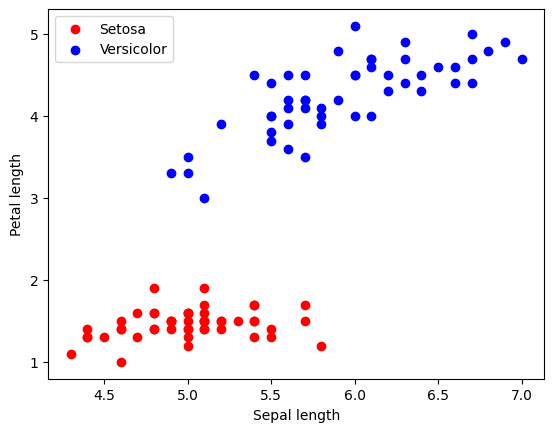

In [4]:
# only use the first two classes for now (perceptron is binary classification)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# only use the 1st and 3rd feature
X = df.iloc[0:100, [0, 2]].values

# plot it
plt.scatter(X[:50, 0], X[:50, 1], color='red', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', label='Versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.show()

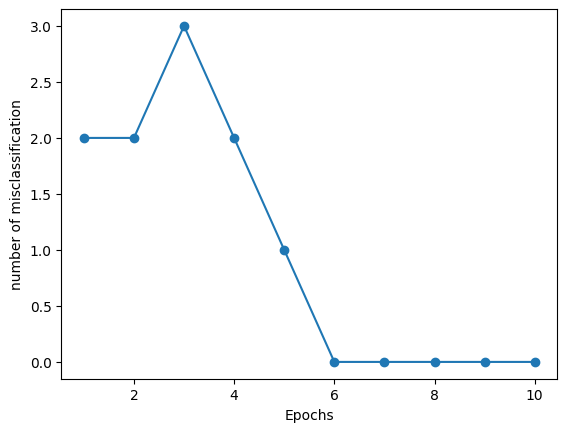

In [5]:
# train
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# plot errors per epoc
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('number of misclassification')
plt.show()

In [6]:
# visualize decision boundary of 2D datasets

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

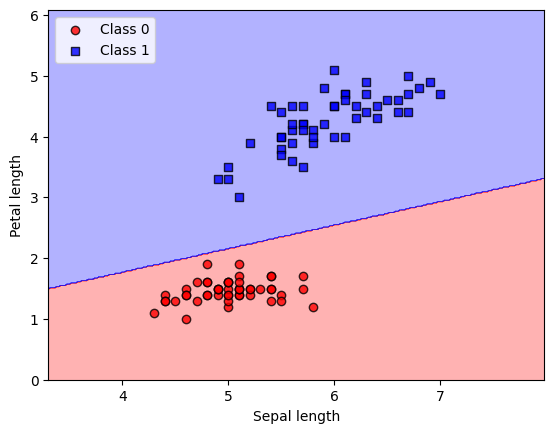

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.show()